## Sentiments Analysis of tweets tweeted in context of Demonetization step taken by the union Govt

In [1]:
# Importing the libraries

import pandas as pd #Library for dealing with the dataset

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
pd.set_option("display.max_colwidth", 200)
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
import re  # Library to clean the data
from nltk.corpus import stopwords  # To Remove Stopwords
from nltk.stem.porter import PorterStemmer # For Stemming Purpose
from nltk.tokenize import word_tokenize
from string import punctuation
import wordcloud

In [2]:
data = pd.read_csv("D:\\Sentiment_analysis\\Demonetization_data29th.csv", encoding='latin')

In [3]:
data.head()

,ID,QUERY,TWEET_ID,INSERTED DATE,TRUNCATED,LANGUAGE,possibly_sensitive,coordinates,retweeted_status,created_at_text,...,source,entities_expanded_urls,json_output,entities_media_count,media_expanded_url,media_url,media_type,video_link,photo_link,twitpic
0,1,%2523%23demonetization,8.036840e+17,07:11.2,0,en,NaN,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,Tue Nov 29 19:36:24 +0000 2016,...,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,"{u'contributors': None, u'truncated': False, u'text': u'RT @SirJadeja: Yes, #\u092e\u094b\u0926\u0940_\u092b\u093f\u0930\u0915\u0940_\u0932\u0947_\u0930\u0939\u093e_\u0939\u0948. Firki Of All Corr...",NaN,NaN,NaN,NaN,0,0,0
1,2,%2523%23demonetization,8.036830e+17,07:11.5,0,en,NaN,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,Tue Nov 29 19:33:34 +0000 2016,...,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,"{u'contributors': None, u'truncated': False, u'text': u'RT @syedsulaiman92: @TelanganaCMO to open 150 Centers of 5rs Meal Scheme on the rep. of @asadowaisi to minimize #Demonetization impact.\nhtt...",NaN,NaN,NaN,NaN,0,0,0
2,3,%2523%23demonetization,8.036830e+17,07:11.8,0,en,NaN,NaN,THIS IS A RETWEET --> DOUBLE-CHECK JSON,Tue Nov 29 19:33:15 +0000 2016,...,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,"{u'contributors': None, u'truncated': False, u'text': u'RT @mdbaid: Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization\n#\u091d\u0942\u0920_\u0932\u09...",NaN,NaN,NaN,NaN,0,0,0
3,4,%2523%23demonetization,8.036830e+17,07:12.5,0,en,0.0,NaN,NaN,Tue Nov 29 19:32:33 +0000 2016,...,"<a href=""http://paper.li"" rel=""nofollow"">Paper.li</a>",http://paper.li/AwlwoodJoinery/1375702090?edition_id=91505b50-b66a-11e6-8835-0cc47a0d1605,"{u'contributors': None, u'truncated': False, u'text': u'The latest Awlwood Joinery Devon Times Daily! https://t.co/Y1i0ZsHw3b #demonetization #queues', u'is_quote_status': False, u'in_reply_to_sta...",NaN,NaN,NaN,NaN,0,0,0
4,5,%2523%23demonetization,8.036830e+17,07:12.7,0,en,0.0,NaN,NaN,Tue Nov 29 19:32:23 +0000 2016,...,"<a href=""http://paper.li"" rel=""nofollow"">Paper.li</a>",http://paper.li/BillRingle/1346437679?edition_id=8b7c3320-b66a-11e6-acf1-0cc47a0d164b,"{u'contributors': None, u'truncated': False, u'text': u'The latest Business Breakthroughs Daily! https://t.co/ompAHsWDRy #demonetization #queues', u'is_quote_status': False, u'in_reply_to_status_i...",NaN,NaN,NaN,NaN,0,0,0


In [4]:
data.shape

(6268, 40)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 40 columns):
ID                           6268 non-null int64
QUERY                        6268 non-null object
TWEET_ID                     6268 non-null float64
INSERTED DATE                6268 non-null object
TRUNCATED                    6268 non-null int64
LANGUAGE                     6268 non-null object
possibly_sensitive           2528 non-null float64
coordinates                  2 non-null object
retweeted_status             4178 non-null object
created_at_text              6268 non-null object
created_at                   6268 non-null object
CONTENT                      6268 non-null object
from_user_screen_name        6268 non-null object
from_user_id                 6268 non-null float64
from_user_followers_count    6268 non-null int64
from_user_friends_count      6268 non-null int64
from_user_listed_count       6268 non-null int64
from_user_statuses_count     6268 non-null int64

In [6]:
round(data.isnull().sum()/len(data.index)*100,2)

ID                            0.00
QUERY                         0.00
TWEET_ID                      0.00
INSERTED DATE                 0.00
TRUNCATED                     0.00
LANGUAGE                      0.00
possibly_sensitive           59.67
coordinates                  99.97
retweeted_status             33.34
created_at_text               0.00
created_at                    0.00
CONTENT                       0.00
from_user_screen_name         0.00
from_user_id                  0.00
from_user_followers_count     0.00
from_user_friends_count       0.00
from_user_listed_count        0.00
from_user_statuses_count      0.00
from_user_description        23.90
from_user_location           28.14
from_user_created_at          0.00
retweet_count                 0.00
entities_urls                71.79
entities_urls_counts          0.00
entities_hashtags             0.61
entities_hashtags_counts      0.00
entities_mentions            21.70
entities_mentions_counts      0.00
in_reply_to_screen_n

In [7]:
pct_null = data.isnull().sum() / len(data)
missing_features = pct_null[pct_null > 0.30].index
missing_features

Index(['possibly_sensitive', 'coordinates', 'retweeted_status',
       'entities_urls', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'entities_expanded_urls', 'entities_media_count', 'media_expanded_url',
       'media_url', 'media_type'],
      dtype='object')

## Dropping columns having more than 30% null values.

In [8]:
data = data.loc[:, data.isin([' ','NULL',0]).mean() < .3]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 34 columns):
ID                           6268 non-null int64
QUERY                        6268 non-null object
TWEET_ID                     6268 non-null float64
INSERTED DATE                6268 non-null object
LANGUAGE                     6268 non-null object
coordinates                  2 non-null object
retweeted_status             4178 non-null object
created_at_text              6268 non-null object
created_at                   6268 non-null object
CONTENT                      6268 non-null object
from_user_screen_name        6268 non-null object
from_user_id                 6268 non-null float64
from_user_followers_count    6268 non-null int64
from_user_friends_count      6268 non-null int64
from_user_listed_count       6268 non-null int64
from_user_statuses_count     6268 non-null int64
from_user_description        4770 non-null object
from_user_location           4504 non-null object

In [10]:
data_1 = data[['LANGUAGE','CONTENT','from_user_followers_count','retweet_count']]

In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 4 columns):
LANGUAGE                     6268 non-null object
CONTENT                      6268 non-null object
from_user_followers_count    6268 non-null int64
retweet_count                6268 non-null int64
dtypes: int64(2), object(2)
memory usage: 196.0+ KB


In [12]:
data_1.head()

,LANGUAGE,CONTENT,from_user_followers_count,retweet_count
0,en,"RT @SirJadeja: Yes, #????_?????_??_???_??. Firki Of All Corrupts &amp; #BlackMoney Holders. Love To See #OppositionRattled By #DeMonetization !",629,314
1,en,RT @syedsulaiman92: @TelanganaCMO to open 150 Centers of 5rs Meal Scheme on the rep. of @asadowaisi to minimize #Demonetization impact.htt,222,43
2,en,"RT @mdbaid: Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization#???_???_??_????? https://t.co",857,18
3,en,The latest Awlwood Joinery Devon Times Daily! https://t.co/Y1i0ZsHw3b #demonetization #queues,3274,0
4,en,The latest Business Breakthroughs Daily! https://t.co/ompAHsWDRy #demonetization #queues,23298,0


In [13]:
data.CONTENT.head()

0    RT @SirJadeja: Yes, #????_?????_??_???_??. Firki Of All Corrupts &amp; #BlackMoney Holders. Love To See #OppositionRattled By #DeMonetization !

1         RT @syedsulaiman92: @TelanganaCMO to open 150 Centers of 5rs Meal Scheme on the rep. of @asadowaisi to minimize #Demonetization impact.htt

2         RT @mdbaid: Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization#???_???_??_????? https://t.co

3                                                       The latest Awlwood Joinery Devon Times Daily! https://t.co/Y1i0ZsHw3b #demonetization #queues
4                                                            The latest Business Breakthroughs Daily! https://t.co/ompAHsWDRy #demonetization #queues
Name: CONTENT, dtype: object

## Data Cleaning

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [14]:

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

## Converting into tidy tweets.

In [15]:
data_1['proper_tweets'] = np.vectorize(remove_pattern)(data_1['CONTENT'], "@[\w]*") 
data_1.head()

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,LANGUAGE,CONTENT,from_user_followers_count,retweet_count,proper_tweets
0,en,"RT @SirJadeja: Yes, #????_?????_??_???_??. Firki Of All Corrupts &amp; #BlackMoney Holders. Love To See #OppositionRattled By #DeMonetization !",629,314,"RT : Yes, #????_?????_??_???_??. Firki Of All Corrupts &amp; #BlackMoney Holders. Love To See #OppositionRattled By #DeMonetization !"
1,en,RT @syedsulaiman92: @TelanganaCMO to open 150 Centers of 5rs Meal Scheme on the rep. of @asadowaisi to minimize #Demonetization impact.htt,222,43,RT : to open 150 Centers of 5rs Meal Scheme on the rep. of to minimize #Demonetization impact.htt
2,en,"RT @mdbaid: Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization#???_???_??_????? https://t.co",857,18,"RT : Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization#???_???_??_????? https://t.co"
3,en,The latest Awlwood Joinery Devon Times Daily! https://t.co/Y1i0ZsHw3b #demonetization #queues,3274,0,The latest Awlwood Joinery Devon Times Daily! https://t.co/Y1i0ZsHw3b #demonetization #queues
4,en,The latest Business Breakthroughs Daily! https://t.co/ompAHsWDRy #demonetization #queues,23298,0,The latest Business Breakthroughs Daily! https://t.co/ompAHsWDRy #demonetization #queues


In [16]:
data_1.proper_tweets.head()

0    RT : Yes, #????_?????_??_???_??. Firki Of All Corrupts &amp; #BlackMoney Holders. Love To See #OppositionRattled By #DeMonetization !

1                                      RT :  to open 150 Centers of 5rs Meal Scheme on the rep. of  to minimize #Demonetization impact.htt

2      RT : Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization#???_???_??_????? https://t.co

3                                             The latest Awlwood Joinery Devon Times Daily! https://t.co/Y1i0ZsHw3b #demonetization #queues
4                                                  The latest Business Breakthroughs Daily! https://t.co/ompAHsWDRy #demonetization #queues
Name: proper_tweets, dtype: object

In [17]:
data_1['proper_tweets'] = data_1['proper_tweets'].str.replace("[^a-zA-Z#]", " ")
data_1.head(10)

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,LANGUAGE,CONTENT,from_user_followers_count,retweet_count,proper_tweets
0,en,"RT @SirJadeja: Yes, #????_?????_??_???_??. Firki Of All Corrupts &amp; #BlackMoney Holders. Love To See #OppositionRattled By #DeMonetization !",629,314,RT Yes # Firki Of All Corrupts amp #BlackMoney Holders Love To See #OppositionRattled By #DeMonetization
1,en,RT @syedsulaiman92: @TelanganaCMO to open 150 Centers of 5rs Meal Scheme on the rep. of @asadowaisi to minimize #Demonetization impact.htt,222,43,RT to open Centers of rs Meal Scheme on the rep of to minimize #Demonetization impact htt
2,en,"RT @mdbaid: Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization#???_???_??_????? https://t.co",857,18,RT Incompetence of modi is d reason for national loss occurred due to ill prepared #demonetization# https t co
3,en,The latest Awlwood Joinery Devon Times Daily! https://t.co/Y1i0ZsHw3b #demonetization #queues,3274,0,The latest Awlwood Joinery Devon Times Daily https t co Y i ZsHw b #demonetization #queues
4,en,The latest Business Breakthroughs Daily! https://t.co/ompAHsWDRy #demonetization #queues,23298,0,The latest Business Breakthroughs Daily https t co ompAHsWDRy #demonetization #queues
5,en,RT @VijaiSardesai: Kudos to the #MargaoMunicipalCouncil for being the first civic body to pass a resolution against chaotic #Demonetization,821,83,RT Kudos to the #MargaoMunicipalCouncil for being the first civic body to pass a resolution against chaotic #Demonetization
6,en,RT @dhume: Chhibber: By itself India's #demonetization won't hurt black money. But it will certainly hit economic growth. https://t.co/2EHs,2506,36,RT Chhibber By itself India s #demonetization won t hurt black money But it will certainly hit economic growth https t co EHs
7,en,RT @ajaymaken: #JanAkroshMarch on #DemonetizationMassive Protest March yesterday!Great enthusiasm!Many thanks to Congress workers and l,741,126,RT #JanAkroshMarch on #DemonetizationMassive Protest March yesterday Great enthusiasm Many thanks to Congress workers and l
8,en,RT @AAPGujarat: News in Print: AAP protests in Gujarat against #demonetization debacle (5/n) https://t.co/KSQtkRFAvZ,58,95,RT News in Print AAP protests in Gujarat against #demonetization debacle n https t co KSQtkRFAvZ
9,en,The latest My Forex Academy! https://t.co/m4ORjgGySp #theworldin #demonetization,32814,0,The latest My Forex Academy https t co m ORjgGySp #theworldin #demonetization


In [18]:
data_1['proper_tweets'] = data_1['proper_tweets'].str.replace("#", " ")
data_1.head()

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,LANGUAGE,CONTENT,from_user_followers_count,retweet_count,proper_tweets
0,en,"RT @SirJadeja: Yes, #????_?????_??_???_??. Firki Of All Corrupts &amp; #BlackMoney Holders. Love To See #OppositionRattled By #DeMonetization !",629,314,RT Yes Firki Of All Corrupts amp BlackMoney Holders Love To See OppositionRattled By DeMonetization
1,en,RT @syedsulaiman92: @TelanganaCMO to open 150 Centers of 5rs Meal Scheme on the rep. of @asadowaisi to minimize #Demonetization impact.htt,222,43,RT to open Centers of rs Meal Scheme on the rep of to minimize Demonetization impact htt
2,en,"RT @mdbaid: Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization#???_???_??_????? https://t.co",857,18,RT Incompetence of modi is d reason for national loss occurred due to ill prepared demonetization https t co
3,en,The latest Awlwood Joinery Devon Times Daily! https://t.co/Y1i0ZsHw3b #demonetization #queues,3274,0,The latest Awlwood Joinery Devon Times Daily https t co Y i ZsHw b demonetization queues
4,en,The latest Business Breakthroughs Daily! https://t.co/ompAHsWDRy #demonetization #queues,23298,0,The latest Business Breakthroughs Daily https t co ompAHsWDRy demonetization queues


Tokeninzing the tweets ,i.e. breakuing them into components

In [19]:
tokenized_tweets = data_1['proper_tweets'].apply(lambda x: x.split()) # tokenizing

In [20]:
tokenized_tweets.head()

0                 [RT, Yes, Firki, Of, All, Corrupts, amp, BlackMoney, Holders, Love, To, See, OppositionRattled, By, DeMonetization]
1                          [RT, to, open, Centers, of, rs, Meal, Scheme, on, the, rep, of, to, minimize, Demonetization, impact, htt]
2    [RT, Incompetence, of, modi, is, d, reason, for, national, loss, occurred, due, to, ill, prepared, demonetization, https, t, co]
3                           [The, latest, Awlwood, Joinery, Devon, Times, Daily, https, t, co, Y, i, ZsHw, b, demonetization, queues]
4                                     [The, latest, Business, Breakthroughs, Daily, https, t, co, ompAHsWDRy, demonetization, queues]
Name: proper_tweets, dtype: object

## now lemmetizing the tweets.

from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) 

joining the tokenized tweets

In [21]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
    
data_1['proper_tweets'] = tokenized_tweets

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Visualizing which words were used the most , i.e which were the words that describe the tweets

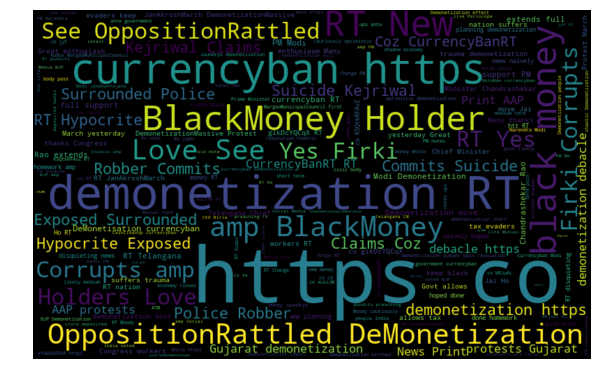

In [22]:
from wordcloud import WordCloud

words = ' '.join([text for text in data_1['proper_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## As we can see that most words that were used were either nuetral or positive.

Next, we will try to extract features from the tokenized tweets.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Bag of words features

In [24]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data_1['proper_tweets'])
bow.shape

(6268, 1000)

# TF-IDF Vectorized features.

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_1['proper_tweets'])
tfidf.shape

(6268, 1000)

In [26]:
data_1.drop(['CONTENT','LANGUAGE'],axis=1, inplace=True)

C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
data_1.rename(columns={'from_user_followers_count': '#Followers','proper_tweets':'Tweets',\
                       'retweet_count':'#ReTweets'}, inplace=True)

C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [28]:
data_1.head()

,#Followers,#ReTweets,Tweets
0,629,314,RT Yes Firki Of All Corrupts amp BlackMoney Holders Love To See OppositionRattled By DeMonetization
1,222,43,RT to open Centers of rs Meal Scheme on the rep of to minimize Demonetization impact htt
2,857,18,RT Incompetence of modi is d reason for national loss occurred due to ill prepared demonetization https t co
3,3274,0,The latest Awlwood Joinery Devon Times Daily https t co Y i ZsHw b demonetization queues
4,23298,0,The latest Business Breakthroughs Daily https t co ompAHsWDRy demonetization queues


## Analysing the sentiments of tweets.

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [30]:
sid = SentimentIntensityAnalyzer()

In [31]:
sid.polarity_scores(data_1.Tweets[0])

{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.7845}

In [32]:
sid.polarity_scores(data_1.Tweets[1])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [33]:
sid.polarity_scores(data_1.Tweets[2])

{'neg': 0.361, 'neu': 0.558, 'pos': 0.082, 'compound': -0.7579}

In [34]:
data_1['Score'] = data_1['Tweets'].apply(lambda Tweets:sid.polarity_scores(Tweets))

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
data_1.head()

,#Followers,#ReTweets,Tweets,Score
0,629,314,RT Yes Firki Of All Corrupts amp BlackMoney Holders Love To See OppositionRattled By DeMonetization,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.7845}"
1,222,43,RT to open Centers of rs Meal Scheme on the rep of to minimize Demonetization impact htt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,857,18,RT Incompetence of modi is d reason for national loss occurred due to ill prepared demonetization https t co,"{'neg': 0.361, 'neu': 0.558, 'pos': 0.082, 'compound': -0.7579}"
3,3274,0,The latest Awlwood Joinery Devon Times Daily https t co Y i ZsHw b demonetization queues,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,23298,0,The latest Business Breakthroughs Daily https t co ompAHsWDRy demonetization queues,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


## Calculating compound scores 

In [36]:
data_1['Compound'] = data_1['Score'].apply(lambda score_dict: score_dict['compound'])

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
data_1.head()

,#Followers,#ReTweets,Tweets,Score,Compound
0,629,314,RT Yes Firki Of All Corrupts amp BlackMoney Holders Love To See OppositionRattled By DeMonetization,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.7845}",0.7845
1,222,43,RT to open Centers of rs Meal Scheme on the rep of to minimize Demonetization impact htt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,857,18,RT Incompetence of modi is d reason for national loss occurred due to ill prepared demonetization https t co,"{'neg': 0.361, 'neu': 0.558, 'pos': 0.082, 'compound': -0.7579}",-0.7579
3,3274,0,The latest Awlwood Joinery Devon Times Daily https t co Y i ZsHw b demonetization queues,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
4,23298,0,The latest Business Breakthroughs Daily https t co ompAHsWDRy demonetization queues,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


### Analysing polarity of tweets from compound score, if its greater than 0 then the polarity is positive otherwise negative.

In [38]:
data_1['Polarity'] = data_1['Compound'].apply(lambda x:'positive' if x>0 else  'neutral' if x==0 else 'negative')

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
data_1.head()

,#Followers,#ReTweets,Tweets,Score,Compound,Polarity
0,629,314,RT Yes Firki Of All Corrupts amp BlackMoney Holders Love To See OppositionRattled By DeMonetization,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.7845}",0.7845,positive
1,222,43,RT to open Centers of rs Meal Scheme on the rep of to minimize Demonetization impact htt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,857,18,RT Incompetence of modi is d reason for national loss occurred due to ill prepared demonetization https t co,"{'neg': 0.361, 'neu': 0.558, 'pos': 0.082, 'compound': -0.7579}",-0.7579,negative
3,3274,0,The latest Awlwood Joinery Devon Times Daily https t co Y i ZsHw b demonetization queues,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
4,23298,0,The latest Business Breakthroughs Daily https t co ompAHsWDRy demonetization queues,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


In [40]:
data_1.Polarity.value_counts()

positive    2477
negative    2060
neutral     1731
Name: Polarity, dtype: int64

In [41]:
round(data_1.Polarity.value_counts()/len(data_1.index)*100,1)

positive    39.5
negative    32.9
neutral     27.6
Name: Polarity, dtype: float64

## 40 % tweets had positive connotations & 33 % tweets had negative connotations and 27% were neutral about it.

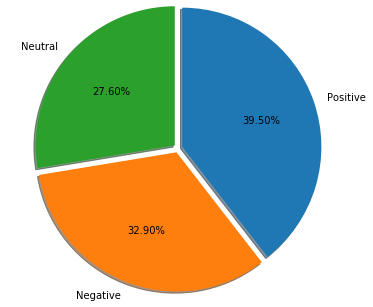

In [42]:
percent = round(data_1.Polarity.value_counts()/len(data_1.index)*100,1)

sub=['Positive','Negative','Neutral']

plt.axis("equal")
plt.pie(percent , labels=sub,radius=1.6,autopct='%1.2f%%',explode=[0.05,0.05,0.05],startangle=90,shadow=True,counterclock=False,pctdistance=0.6)
plt.show()

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


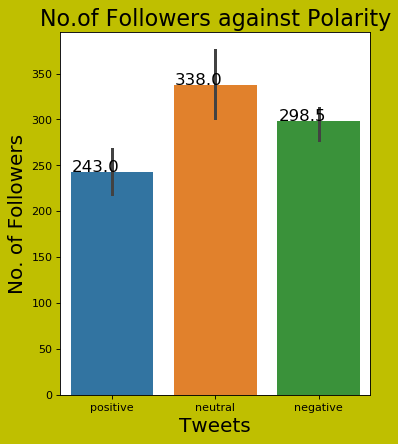

In [43]:
plt.figure(figsize=(5,6),dpi=80,facecolor='y',edgecolor='k')

figx=sns.barplot(x='Polarity', y='#Followers',estimator=np.median, data= data_1)
plt.xlabel("Tweets",fontsize=18,color='black')
plt.ylabel("No. of Followers",fontsize=18,color='black')
plt.title("No.of Followers against Polarity",fontsize=20,color='black')

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

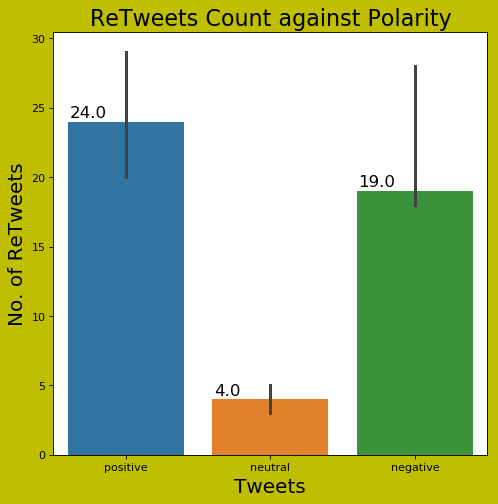

In [44]:
plt.figure(figsize=(7,7) ,dpi=80,facecolor='y',edgecolor='c')
figx=sns.barplot(x='Polarity', y='#ReTweets',estimator=np.median, data= data_1)
plt.xlabel("Tweets",fontsize=18,color='black')
plt.ylabel("No. of ReTweets",fontsize=18,color='black')
plt.title("ReTweets Count against Polarity",fontsize=20,color='black')

for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()